# Evaluate extracted TOC

## Get Data

In [1]:
%pip install zss

Note: you may need to restart the kernel to use updated packages.


### Get the ground truth (GT) and create the hierarchy format needed for the edit tree distance computed by zss

In [2]:
import string
from zss import simple_distance, Node
import traceback
from collections import defaultdict
import os
section_gt=defaultdict(list)
gt_dict={}
depth_dict={}
maxi=defaultdict(list)
for f in sorted(os.listdir("./data/GT_TOCs/")):
    if f.endswith(".toc"): 
        print(f[:-4])
        try:
            gt_list=[]
            with open(str("./data/GT_TOCs/"+f), "r", encoding='utf-8-sig') as toc:
                gt_toc=toc.readlines()
                gt_list.append(str('Node("root")'))
                prev=0
                maximum=0
                for gt in gt_toc:
                    section_gt[f[:-4]].append(gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))

                    if int(gt.split(",")[0])>maximum:
                        maximum=int(gt.split(",")[0])
                    if prev==int(gt.split(",")[0]):
                         gt_list.append(str(').addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev<int(gt.split(",")[0]):
                        gt_list.append(str('.addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev>int(gt.split(",")[0]):
                        for x in range(prev-int(gt.split(',')[0])+1):
                            gt_list.append(')')
                        gt_list.append(str('.addkid(Node("'+gt.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))  
                    prev=int(gt.split(",")[0])
                for x in range(int(gt_toc[-1].split(',')[0])):
                            gt_list.append(')')
            gt_hierarchy="".join(gt_list)
            gt_dict[f[:-4]]=gt_hierarchy  
            depth_dict[f[:-4]]=maximum
            maxi[maximum].append(f[:-4])
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
administrative-decision-making-in-australian-migration-l
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
a

### TOC-based PageParser

In [3]:
pdfstructure_depth={}
pdfstructure_dict={}
section_toc=defaultdict(list)
for f in sorted(os.listdir("./toc-based-page-parser/TOCs/")):
    if f.endswith(".toc"): 
        print(f[:-4].rstrip(string.digits).rstrip("_"))
        try:
            pdfstructure_list=[]
            with open(str("./toc-based-page-parser/TOCs/"+f), "r", encoding='utf-8-sig') as pdfstruct:
                pdfstructure=pdfstruct.readlines()
                pdfstructure_list.append(str('Node("root")'))
                prev=0
                maximum=0
                for pd in pdfstructure:
                    section_toc[f[:-4]].append(pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))

                    if int(pd.split(",")[0])>maximum:
                        maximum=int(pd.split(",")[0])
                    if prev==int(pd.split(",")[0]):
                         pdfstructure_list.append(str(').addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev<int(pd.split(",")[0]):
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev>int(pd.split(",")[0]):
                        for x in range(prev-int(pd.split(",")[0])+1):
                            pdfstructure_list.append(')')
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))  
                    prev=int(pd.split(",")[0])
                for x in range(int(pdfstructure[-1].split(",")[0])):
                            pdfstructure_list.append(')')
            pdfstructure_hierarchy="".join(pdfstructure_list)
            pdfstructure_depth[f[:-4]]=maximum+1
            pdfstructure_dict[f[:-4]]=pdfstructure_hierarchy
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
administrative-decision-making-in-australian-migration-l
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
a

### LLM-Refined PageParser

In [4]:
import csv
llmstructure_depth={}
llmstructure_dict={}
section_llm=defaultdict(list)
for f in sorted(os.listdir("./title_candidates_clean/")):
    if f.endswith(".csv"): 
        print(f[:-4].rstrip(string.digits).rstrip("_"))
        try:
            pdfstructure_list=[]
            with open(str("./title_candidates_clean/"+f), "r", encoding='utf-8-sig') as pdfstruct:
                pdfstructure=pdfstruct.readlines()
                pdfstructure_list.append(str('Node("root")'))
                prev=0
                maximum=0
                for pd in pdfstructure:
                    section_llm[f[7:-4]].append(pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))

                    if int(pd.split(",")[0])>maximum:
                        maximum=int(pd.split(",")[0])
                    if prev==int(pd.split(",")[0]):
                         pdfstructure_list.append(str(').addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev<int(pd.split(",")[0]):
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))
                    elif prev>int(pd.split(",")[0]):
                        for x in range(prev-int(pd.split(",")[0])+1):
                            pdfstructure_list.append(')')
                        pdfstructure_list.append(str('.addkid(Node("'+pd.split(",")[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", "")+'")'))  
                    prev=int(pd.split(",")[0])
                for x in range(int(pdfstructure[-1].split(",")[0])):
                            pdfstructure_list.append(')')
            pdfstructure_hierarchy="".join(pdfstructure_list)
            llmstructure_depth[f[7:-4]]=maximum+1
            llmstructure_dict[f[7:-4]]=pdfstructure_hierarchy
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

titles_6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
titles_a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
titles_a-kind-of-mending-restorative-justice-in-the-pacific-islands
titles_access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
titles_access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
titles_access-to-knowledge-in-the-age-of-intellectual-property
titles_accountability-and-the-law-rights-authority-and-transparency-of-public-power
titles_administrative-decision-making-in-australian-migration-l
titles_advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
titles_aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
titles_agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
titles_al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
titles_amicus-curiae-bef

### PDFStructure Parser

In [5]:
section_pds=defaultdict(list)

for f in os.listdir("./pdfstructure-master/hierarchies/"):
    if f.endswith(".txt") and str(f[:-4]+".toc") in os.listdir("./data/GT_TOCs/"): 
        print(f)
        try:
            with open(str("./pdfstructure-master/hierarchies/"+f), "r", encoding='utf-8-sig') as pdfstruct:
                pdfst=eval(pdfstruct.read())
                for pd in pdfst:
                    section_pds[f[:-4]].append(pd[1].strip("\r\n").strip("\n").replace("/", "").replace("“", "").replace("”","").replace("’", "").replace(")", "").replace("(", "").replace('"', "").replace("'", ""))
                    
        except Exception:
            print(traceback.format_exc())
            print("fail")
            input()

a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu.txt
consumer-data-protection-in-brazil-china-and-germany-a-comparative-study.txt
a-kind-of-mending-restorative-justice-in-the-pacific-islands.txt
the-endangered-species-act-history-implementation-successes-and-controversies.txt
german-and-asian-perspectives-on-company-law-law-and-policy-perspectives.txt
brexit-and-the-future-of-eu-politics-a-constitutional-law-perspective.txt
the-constitution-and-governance-in-camer.txt
reconsidering-constitutional-formation-i-national-sovereignty-a-comparative-analysis-of-the-juridification-by-constituti.txt
climate-change-and-international-shipping-the-regulatory-framework-for-the-reduction-of-greenhouse-gas-emissions.txt
reconsidering-constitutional-formation-ii-decisive-constitutional-normativity-from-old-liberties-to-new-precedence.txt
revisiting-chinas-competition-law-and-its-interaction-with-intellectual-property-rights.txt
aegis-or-achilles-heel-the-dilemma-of-homology

## Calculate ETD for the TOC-based PageParser

In [6]:
print(len(gt_dict.keys()))
print(len(pdfstructure_dict.keys()))
print(len(depth_dict.keys()))
print(len(pdfstructure_depth.keys()))
import csv
dist=None
etd={}
with open("evaluation_hierarchy_toc.csv", "w", encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    writer.writerow(["File", "Edit Tree Distance", "GT_Depth", "TOC_Depth"])
    for k in gt_dict.keys():
        try:
            print(k)
            dist=simple_distance(eval(pdfstructure_dict[k]), eval(gt_dict[k]))
            print(dist)
            etd[k]=dist
            writer.writerow([k, dist, depth_dict[k], pdfstructure_depth[k]])

        except Exception:
            print(traceback.format_exc())
            print("fail")
            
            continue

49
259
49
259
6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
10.0
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
2.0
a-kind-of-mending-restorative-justice-in-the-pacific-islands
225.0
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
333.0
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
14.0
access-to-knowledge-in-the-age-of-intellectual-property
198.0
accountability-and-the-law-rights-authority-and-transparency-of-public-power
104.0
administrative-decision-making-in-australian-migration-l
169.0
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
347.0
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
15.0
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
208.0
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
64.0
amicus-curiae-before-interna

## Calculate ETD for the LLM-Refined PageParser

In [7]:
print(len(gt_dict.keys()))
print(len(llmstructure_dict.keys()))
print(len(depth_dict.keys()))
print(len(llmstructure_depth.keys()))
import csv
dist=None
llmetd={}
with open("evaluation_hierarchy_llm.csv", "w", encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    writer.writerow(["File", "Edit Tree Distance", "GT_Depth", "TOC_Depth"])
    for k in gt_dict.keys():
        try:
            print(k)
            dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
            print(dist)
            llmetd[k]=dist
            writer.writerow([k, dist, depth_dict[k], llmstructure_depth[k]])

        except Exception:
            print(traceback.format_exc())
            print("fail")
            
            continue

49
48
49
48
6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
72.0
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("A BIRD THAT FLIES WITH TWO WINGS").addkid(Node("Kastom and state justice systems in Vanuatu"))).addkid(Node("A BIRD THAT FLIES WITH TWO WINGS").addkid(Node("Kastom and state justice systems in Vanuatu").addkid(Node("Miranda Forsyth")).addkid(Node("Published by ANU E Press")).addkid(Node("The Australian National University")).addkid(Node("Canberra ACT 0200")).addkid(Node("Email: anuepress@anu.edu.au")).addkid(Node("This title is also available online at: http:epress.anu.edu.aukastom _citation.html")).addkid(Node("National Library of Australia")).addkid(Nod

134.0
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("ADVANCING EQUALITY").addkid(Node("How Constitutional Rights Can Make a Difference Worldwide").addkid(Node("JODY HEYMANN")).addkid(Node("ALETA SPRAGUE")).addkid(Node("AMY RAUB")).addkid(Node("Foreword by Dikgang Moseneke")))).addkid(Node("Advancing Equality")).addkid(Node("Advancing Equality").addkid(Node("How Constitutional Rights Can Make a Difference Worldwide").addkid(Node("Jody Heymann")).addkid(Node("Foreword by Dikgang Moseneke")))).addkid(Node("Contents")).addkid(Node("List of Illustrations")).addkid(Node("Foreword")).addkid(Node("The Urgency of Advancing Equality")).addkid(Node("Part One").addkid(Node("Equal Rights and Non

<string>:1: SyntaxWarning: invalid escape sequence '\ '


188.0
applicable-law-in-investor-state-arbitrati
123.0
applying-shari-a-in-the-west-facts-fears-and-the-future-of-islamic-rules-on-family-relations-in-the-west
209.0
australian-clinical-legal-education-designing-and-operating-a-best-practice-clinical-program-in-an-australian-law-sch
372.0
bank-regulation-risk-management-and-compliance-theory-practice-and-key-problem-areas
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("Bank Regulation").addkid(Node("Theory").addkid(Node("First published 2020 by Informa Law from Routledge")).addkid(Node("2 Park Square")).addkid(Node("52 Vanderbilt Avenue")).addkid(Node("Informa Law from Routledge is an imprint of the Taylor & Francis Group")).addkid(Node("© 2020 Alexander Dill")).addkid(Node("The right of Alexander Dill to be 

204.0
employee-participation-and-collective-bargaining-in-europe-and-chi
265.0
german-and-asian-perspectives-on-company-law-law-and-policy-perspectives
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("Beiträge zum ausländischen und internationalen Privatrecht")).addkid(Node("Herausgegeben vom Max-Planck-Institut für ausländisches und internationales Privatrecht")).addkid(Node("Direktoren: Jürgen Basedow")).addkid(Node("German and Asian Perspectives on Company Law")).addkid(Node("Law and Policy Perspectives")).addkid(Node("Edited by Holger Fleischer")).addkid(Node("Mohr Siebeck")).addkid(Node("e-ISBN PDF 978-3-16-155138-3")).addkid(Node("ISBN  978-3-16-155026-3")).addkid(Node("ISSN 0340-6709 Beiträge zum ausländischen und internationalen Privatrecht")).addkid(N

363.0
introduction-to-swiss-l


<string>:1: SyntaxWarning: invalid octal escape sequence '\501'


523.0
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
150.0
patents-and-public-health-legalising-the-policy-thoughts-in-the-doha-trips-declaration-of-14-november-2001
168.0
populist-challenges-to-constitutional-interpretation-in-europe-and-bey
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("Populist Challenges to Constitutional Interpretation in Europe and Beyond")).addkid(Node("Comparative Constitutional Change").addkid(Node("Series editors:")).addkid(Node("Also in the series:").addkid(Node("Icelandic Constitutional Reform")).addkid(Node("Dynamic Federalism")).addkid(Node("Peace")).addkid(Node("New Challenges to Constitutional Adjudication in Europe")).addkid(Node("Constitutional Change and Popular Sovereignty")))).addk

224.0
revisiting-chinas-competition-law-and-its-interaction-with-intellectual-property-rights
73.0
second-generation-patents-in-pharmaceutical-innovati
294.0
the-constitution-and-governance-in-camer
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("The Constitution and Governance in Cameroon").addkid(Node("Laura-Stella  E.  Enonchong"))).addkid(Node("Routledge Studies on Law in Africa").addkid(Node("Series Editor: Makau W. Mutua")).addkid(Node("The Constitution and Governance in Cameroon").addkid(Node("Laura-Stella E. Enonchong")))).addkid(Node("The Constitution and Governance in Cameroon").addkid(Node("Laura-Stella E. Enonchong"))).addkid(Node("First published 2021 by Routledge").addkid(Node("2 Park Square")).addkid(Node("Routledge is an imprint of the Taylor 

56.0
the-future-of-the-law-of-the-sea-bridging-gaps-between-national-individual-and-common-interests
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("The Future of the Law of the Sea: Bridging Gaps Between National")).addkid(Node("The Future of the Law of the Sea: Bridging Gaps Between National")).addkid(Node("The Future of the Law of the Sea: Bridging Gaps Between National").addkid(Node("Editor: Gemma Andreone")).addkid(Node("Institute for International Legal Studies")).addkid(Node("Italian National Research Council")).addkid(Node("Rome")).addkid(Node("ISBN 978-3-319-51273-0")).addkid(Node("ISBN 978-3-319-51274-7 eBook")).addkid(Node("DOI 10.1007978-3-319-51274-7")).addkid(Node("Library of Congress Control Number: 2017936385")).addkid(Node("Foreword")).addkid

409.0
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
412.0
the-regulation-of-megabanks-legal-frameworks-of-the-usa-and-eu
208.0
the-role-of-the-patent-system-in-stimulating-innovation-and-technology-transfer-for-climate-change-including-aspects-of-licensing-and-competition-l
Traceback (most recent call last):
  File "/tmp/ipykernel_8966/1568178689.py", line 14, in <module>
    dist=simple_distance(eval(llmstructure_dict[k]), eval(gt_dict[k]))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    Node("root").addkid(Node("MIPLC Studies")).addkid(Node("The Role of the Patent System in Stimulating Innovation and Technology Transfer for Climate Change").addkid(Node("Including Aspects of Licensing and Competition Law"))).addkid(Node("MIPLC Studies").addkid(Node("Edited by").addkid(Node("Prof. Dr. Christoph Ann")).addkid(Node("Technische Universität München"))

347.0
un-human-rights-mechanisms-and-the-environment-synergies-challenges-trajectories
204.0
women-and-the-un-a-new-history-of-womens-international-human-rights
151.0


## Calculate P and R

### for TOC-based Pageparser

In [8]:
from Levenshtein import distance
# Precision
prec = {}
tolprec = {}

for k in section_gt.keys():
    try: 
        tp = 0
        fp = 0
        toltp = 0
        tolfp = 0
        
        for v in section_toc.get(k, []):
            if v in section_gt.get(k, []):
                tp += 1
            else:
                fp += 1
            
            dists = [distance(v, value) for value in section_gt.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfp += 1

        prec[k] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        tolprec[k] = toltp / (toltp + tolfp) if (toltp + tolfp) > 0 else 0.0
    
    except ZeroDivisionError:
        prec[k] = 0.0
        tolprec[k] = 0.0

print("Precision:", prec.values()) 
print("Tolerant Precision:", tolprec.values()) 
    
# Recall
rec = {}
tolrec = {}

for k in section_gt.keys():
    try:
        tp = 0
        fn = 0
        toltp = 0
        tolfn = 0
        
        for v in section_gt.get(k, []):
            if v in section_toc.get(k, []):
                tp += 1
            else:
                fn += 1
            
            dists = [distance(v, value) for value in section_toc.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfn += 1

        rec[k] = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        tolrec[k] = toltp / (toltp + tolfn) if (toltp + tolfn) > 0 else 0.0

    except ZeroDivisionError:
        rec[k] = 0.0
        tolrec[k] = 0.0

print("Recall:", rec.values()) 
print("Tolerant Recall:", tolrec.values())

Precision: dict_values([0.0, 1.0, 0.0, 1.0, 0.7142857142857143, 0.9714285714285714, 0.7272727272727273, 0.6666666666666666, 0.8461538461538461, 0.96875, 0.9473684210526315, 0.1346153846153846, 0.9952830188679245, 0.26666666666666666, 0.6388888888888888, 0.5230769230769231, 0.7058823529411765, 0.8666666666666667, 0.9036697247706422, 0.41025641025641024, 0.06, 0.9494949494949495, 0.22580645161290322, 0.993006993006993, 0.984375, 0.9052631578947369, 0.9446640316205533, 0.963302752293578, 0.9818181818181818, 0.9552631578947368, 0.46394984326018807, 0.9865771812080537, 0.9924812030075187, 0.8585858585858586, 0.905982905982906, 0.9006211180124224, 0.15, 0.9824561403508771, 0.9964028776978417, 0.8557213930348259, 0.8955223880597015, 0.9578947368421052, 0.9882352941176471, 0.9975669099756691, 0.9051094890510949, 0.9864864864864865, 0.8269662921348314, 0.9139072847682119, 0.8173076923076923])
Tolerant Precision: dict_values([0.0, 1.0, 0.6153846153846154, 1.0, 1.0, 1.0, 0.7272727272727273, 0.666

In [9]:
#we again calculate the metrics also per level
print(maxi.keys())

precision_2=[]
precision_3=[]
precision_4=[]
precision_5=[]
precision_6=[]
precision_7=[]

recall_2=[]
recall_3=[]
recall_4=[]
recall_5=[]
recall_6=[]
recall_7=[]

etd_2=[]
etd_3=[]
etd_4=[]
etd_5=[]
etd_6=[]
etd_7=[]

tolprecision_2=[]
tolprecision_3=[]
tolprecision_4=[]
tolprecision_5=[]
tolprecision_6=[]
tolprecision_7=[]

tolrecall_2=[]
tolrecall_3=[]
tolrecall_4=[]
tolrecall_5=[]
tolrecall_6=[]
tolrecall_7=[]

etd_by_level=defaultdict(list)
for f in maxi[2]:
    precision_2.append(prec[f]) 
    tolprecision_2.append(tolprec[f]) 
    recall_2.append(rec[f]) 
    tolrecall_2.append(tolrec[f]) 
    etd_2.append(etd[f])
    etd_by_level[2].append((f, etd[f]))
    
for f in maxi[3]:
    precision_3.append(prec[f]) 
    tolprecision_3.append(tolprec[f])
    recall_3.append(rec[f]) 
    tolrecall_3.append(tolrec[f]) 
    etd_3.append(etd[f])
    etd_by_level[3].append((f, etd[f]))
    
for f in maxi[4]:
    precision_4.append(prec[f]) 
    tolprecision_4.append(tolprec[f])
    recall_4.append(rec[f]) 
    tolrecall_4.append(tolrec[f]) 
    etd_4.append(etd[f])
    etd_by_level[4].append((f, etd[f]))
    
for f in maxi[5]:
    precision_5.append(prec[f]) 
    tolprecision_5.append(tolprec[f])
    recall_5.append(rec[f]) 
    tolrecall_5.append(tolrec[f]) 
    etd_5.append(etd[f])
    etd_by_level[5].append((f, etd[f]))
    
for f in maxi[6]:
    precision_6.append(prec[f]) 
    tolprecision_6.append(tolprec[f])
    recall_6.append(rec[f]) 
    tolrecall_6.append(tolrec[f]) 
    etd_6.append(etd[f])
    etd_by_level[6].append((f, etd[f]))
    
for f in maxi[7]:
    print(f)
    precision_7.append(prec[f]) 
    tolprecision_7.append(tolprec[f])
    recall_7.append(rec[f]) 
    tolrecall_7.append(tolrec[f]) 
    etd_7.append(etd[f])
    etd_by_level[7].append((f, etd[f]))
    
print(precision_7)
print(tolprecision_7)
    
    

dict_keys([2, 4, 3, 5, 7, 6])
amicus-curiae-before-international-courts-and-tribunals
employee-participation-and-collective-bargaining-in-europe-and-chi
industrial-concentration-and-the-chicago-school-of-antitrust-analysis
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
refining-child-pornography-law-crime-language-and-social-consequences
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
[0.9952830188679245, 0.9446640316205533, 0.9818181818181818, 0.9552631578947368, 0.9865771812080537, 0.15, 0.9882352941176471, 0.9975669099756691]
[0.9952830188679245, 0.9446640316205533, 0.9818181818181818, 0.9578947368421052, 0.9865771812080537, 0.15, 

### for LLM-Refined PageParser

In [10]:
#%pip install levenshtein
from Levenshtein import distance
# Precision
llmprec = {}
llmtolprec = {}
print(section_llm.keys())
for k in section_gt.keys():
    try: 
        tp = 0
        fp = 0
        toltp = 0
        tolfp = 0
        
        for v in section_llm.get(k, []):
            if v in section_gt.get(k, []):
                tp += 1
            else:
                fp += 1
            
            dists = [distance(v, value) for value in section_gt.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfp += 1

        llmprec[k] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        llmtolprec[k] = toltp / (toltp + tolfp) if (toltp + tolfp) > 0 else 0.0
    
    except ZeroDivisionError:
        llmprec[k] = 0.0
        llmtolprec[k] = 0.0

print("Precision:", llmprec.values()) 
print("Tolerant Precision:", llmtolprec.values()) 
    
# Recall
llmrec = {}
llmtolrec = {}

for k in section_gt.keys():
    try:
        tp = 0
        fn = 0
        toltp = 0
        tolfn = 0
        for v in section_gt.get(k, []):
            if v in section_llm.get(k, []):
                tp += 1
            else:
                fn += 1
            
            dists = [distance(v, value) for value in section_llm.get(k, [])]
            if dists and min(dists) < 2:
                toltp += 1
            else:
                tolfn += 1

        llmrec[k] = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        llmtolrec[k] = toltp / (toltp + tolfn) if (toltp + tolfn) > 0 else 0.0

    except ZeroDivisionError:
        llmrec[k] = 0.0
        llmtolrec[k] = 0.0

print("Recall:", llmrec.values()) 
print("Tolerant Recall:", llmtolrec.values())

dict_keys(['6-traditional-medicines-law-and-the-dis-ordering-of-temporalities', 'a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu', 'a-kind-of-mending-restorative-justice-in-the-pacific-islands', 'access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace', 'access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati', 'access-to-knowledge-in-the-age-of-intellectual-property', 'accountability-and-the-law-rights-authority-and-transparency-of-public-power', 'administrative-decision-making-in-australian-migration-l', 'advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide', 'aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes', 'agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements', 'al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati', 'amicus-curiae-before-international-courts-and-tribunals', 'a

In [11]:
#we again calculate the metrics also per level
print(maxi.keys())

llmprecision_2=[]
llmprecision_3=[]
llmprecision_4=[]
llmprecision_5=[]
llmprecision_6=[]
llmprecision_7=[]

llmrecall_2=[]
llmrecall_3=[]
llmrecall_4=[]
llmrecall_5=[]
llmrecall_6=[]
llmrecall_7=[]

llmetd_2=[]
llmetd_3=[]
llmetd_4=[]
llmetd_5=[]
llmetd_6=[]
llmetd_7=[]

llmtolprecision_2=[]
llmtolprecision_3=[]
llmtolprecision_4=[]
llmtolprecision_5=[]
llmtolprecision_6=[]
llmtolprecision_7=[]

llmtolrecall_2=[]
llmtolrecall_3=[]
llmtolrecall_4=[]
llmtolrecall_5=[]
llmtolrecall_6=[]
llmtolrecall_7=[]

llmetd_by_level=defaultdict(list)
for f in maxi[2]:
    llmprecision_2.append(llmprec[f]) 
    llmtolprecision_2.append(llmtolprec[f]) 
    llmrecall_2.append(llmrec[f]) 
    llmtolrecall_2.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_2.append(llmetd[f])
        llmetd_by_level[2].append((f, llmetd[f]))
    
for f in maxi[3]:
    llmprecision_3.append(llmprec[f]) 
    llmtolprecision_3.append(llmtolprec[f])
    llmrecall_3.append(llmrec[f]) 
    llmtolrecall_3.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_3.append(llmetd[f])
        llmetd_by_level[3].append((f, llmetd[f]))
    
for f in maxi[4]:
    llmprecision_4.append(llmprec[f]) 
    llmtolprecision_4.append(llmtolprec[f])
    llmrecall_4.append(llmrec[f]) 
    llmtolrecall_4.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_4.append(llmetd[f])
        llmetd_by_level[4].append((f, llmetd[f]))
    
for f in maxi[5]:
    llmprecision_5.append(llmprec[f]) 
    llmtolprecision_5.append(llmtolprec[f])
    llmrecall_5.append(llmrec[f]) 
    llmtolrecall_5.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_5.append(llmetd[f])
        llmetd_by_level[5].append((f, llmetd[f]))
    
for f in maxi[6]:
    llmprecision_6.append(llmprec[f]) 
    llmtolprecision_6.append(llmtolprec[f])
    llmrecall_6.append(llmrec[f]) 
    llmtolrecall_6.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_6.append(llmetd[f])
        llmetd_by_level[6].append((f, llmetd[f]))
    
for f in maxi[7]:
    print(f)
    llmprecision_7.append(llmprec[f]) 
    llmtolprecision_7.append(llmtolprec[f])
    llmrecall_7.append(llmrec[f]) 
    llmtolrecall_7.append(llmtolrec[f]) 
    if f in llmetd.keys():
        llmetd_7.append(llmetd[f])
        llmetd_by_level[7].append((f, llmetd[f]))
    
print(llmprecision_7)
print(llmtolprecision_7)
    

dict_keys([2, 4, 3, 5, 7, 6])
amicus-curiae-before-international-courts-and-tribunals
employee-participation-and-collective-bargaining-in-europe-and-chi
industrial-concentration-and-the-chicago-school-of-antitrust-analysis
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
refining-child-pornography-law-crime-language-and-social-consequences
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
[0.041666666666666664, 0.3630952380952381, 0.2222222222222222, 0.4908256880733945, 0.11428571428571428, 0.3023255813953488, 0.5166666666666667, 0.06862745098039216]
[0.04583333333333333, 0.3630952380952381, 0.2222222222222222, 0.536697247706422, 0.114285

### for PDFStructure parser

In [12]:
from Levenshtein import distance

# Precision
pdsprec={}
pdstolprec={}

for k in section_gt.keys():
  try: 
    tp=0
    fp=0
    toltp=0
    tolfp=0
    for v in section_pds.get(k, []):
        if v in section_gt.get(k, []):
            tp+=1
        else:
            fp+=1
        dists = [distance(v, value) for value in section_gt.get(k, [])]
        for value in section_gt[k]:
            dists.append(distance(v,value))
        if dists and min(dists) < 2:
                toltp+=1
            
        else:
            tolfp+=1
    pdsprec[k] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    pdstolprec[k] = toltp / (toltp + tolfp) if (toltp + tolfp) > 0 else 0.0

  except ZeroDivisionError:
    pdsprec[k]=0.0
    pdstolprec[k]=0.0

print("Precision:", pdsprec.values()) 
print("Tolerant Precision:", pdstolprec.values()) 
    
# Recall
pdsrec={}
pdstolrec={}

for k in section_gt.keys():
    try:
        tp=0
        fn=0
        toltp=0
        tolfn=0
        for v in section_gt.get(k, []):
            if v in section_pds.get(k, []):
                tp+=1
            else:
                fn+=1
            dists = [distance(v, value) for value in section_pds.get(k, [])]
            if dists and min(dists) < 2:
                    toltp+=1
            else:
                tolfn+=1
            #ind=dists.index(min(dists))
            #print(dists[ind])
        pdsrec[k]=tp / (tp + fn) if (tp + fn) > 0 else 0.0
        pdstolrec[k]=toltp / (toltp + tolfn) if (toltp + tolfn) > 0 else 0.0
    except ZeroDivisionError:
        pdsrec[k]=0.0
        pdstolrec[k]=0.0

print("Recall:", pdsrec.values()) 
print("Tolerant Recall:", pdstolrec.values())




Precision: dict_values([0.0, 0.42160278745644597, 0.8052631578947368, 0.8518518518518519, 0.5, 0.23728813559322035, 0.0, 0.8457446808510638, 0.0, 0.0, 0.20464135021097046, 0.6428571428571429, 0.2987390882638215, 0.14655172413793102, 0.0, 0.7734375, 0.14814814814814814, 0.6752136752136753, 0.0, 0.08099688473520249, 0.0, 0.5705521472392638, 0.27906976744186046, 0.11042944785276074, 0.059602649006622516, 0.041666666666666664, 0.27635327635327633, 0.37530864197530867, 0.0, 0.109375, 0.07092198581560284, 0.14285714285714285, 0.0, 0.0, 0.04779411764705882, 0.48148148148148145, 0.16216216216216217, 0.0, 0.6220472440944882, 0.11428571428571428, 0.33480176211453744, 0.68, 0.1372854914196568, 0.0, 0.07802874743326489, 0.21481481481481482, 0.2526843235504653, 0.0, 0.2948717948717949])
Tolerant Precision: dict_values([0.0, 0.42857142857142855, 0.8526315789473684, 0.9259259259259259, 0.5833333333333334, 0.288135593220339, 0.0, 0.851063829787234, 0.0, 0.0, 0.2616033755274262, 0.6428571428571429, 0.3

In [13]:
print(maxi.keys())

pdsprecision_2=[]
pdsprecision_3=[]
pdsprecision_4=[]
pdsprecision_5=[]
pdsprecision_6=[]
pdsprecision_7=[]

pdsrecall_2=[]
pdsrecall_3=[]
pdsrecall_4=[]
pdsrecall_5=[]
pdsrecall_6=[]
pdsrecall_7=[]



pdstolprecision_2=[]
pdstolprecision_3=[]
pdstolprecision_4=[]
pdstolprecision_5=[]
pdstolprecision_6=[]
pdstolprecision_7=[]

pdstolrecall_2=[]
pdstolrecall_3=[]
pdstolrecall_4=[]
pdstolrecall_5=[]
pdstolrecall_6=[]
pdstolrecall_7=[]

for f in maxi[2]:
    pdsprecision_2.append(pdsprec[f]) 
    pdstolprecision_2.append(pdstolprec[f]) 
    pdsrecall_2.append(pdsrec[f]) 
    pdstolrecall_2.append(pdstolrec[f]) 
    
    
for f in maxi[3]:
    pdsprecision_3.append(pdsprec[f]) 
    pdstolprecision_3.append(pdstolprec[f])
    pdsrecall_3.append(pdsrec[f]) 
    pdstolrecall_3.append(pdstolrec[f]) 

    
for f in maxi[4]:
    pdsprecision_4.append(pdsprec[f]) 
    pdstolprecision_4.append(pdstolprec[f])
    pdsrecall_4.append(pdsrec[f]) 
    pdstolrecall_4.append(pdstolrec[f]) 
    
for f in maxi[5]:
    pdsprecision_5.append(pdsprec[f]) 
    pdstolprecision_5.append(pdstolprec[f])
    pdsrecall_5.append(pdsrec[f]) 
    pdstolrecall_5.append(pdstolrec[f]) 
   
for f in maxi[6]:
    pdsprecision_6.append(pdsprec[f]) 
    pdstolprecision_6.append(pdstolprec[f])
    pdsrecall_6.append(pdsrec[f]) 
    pdstolrecall_6.append(pdstolrec[f]) 
   
    
for f in maxi[7]:
    print(f)
    pdsprecision_7.append(pdsprec[f]) 
    pdstolprecision_7.append(pdstolprec[f])
    pdsrecall_7.append(pdsrec[f]) 
    pdstolrecall_7.append(pdstolrec[f]) 
   
    
print(pdsprecision_7)
print(pdstolprecision_7)
    

dict_keys([2, 4, 3, 5, 7, 6])
amicus-curiae-before-international-courts-and-tribunals
employee-participation-and-collective-bargaining-in-europe-and-chi
industrial-concentration-and-the-chicago-school-of-antitrust-analysis
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
necessity-or-nuisance-recourse-to-human-rights-in-substantive-international-criminal-l
refining-child-pornography-law-crime-language-and-social-consequences
the-law-applicable-to-security-interests-in-intermediated-securities-under-ohada-l
the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
[0.2987390882638215, 0.27635327635327633, 0.0, 0.109375, 0.14285714285714285, 0.16216216216216217, 0.1372854914196568, 0.0]
[0.36081474296799226, 0.6438746438746439, 0.0, 0.5911458333333334, 0.14285714285714285, 0.16216216216216217, 0.5413416536661466, 0

### TOC-based Pageparser final figure

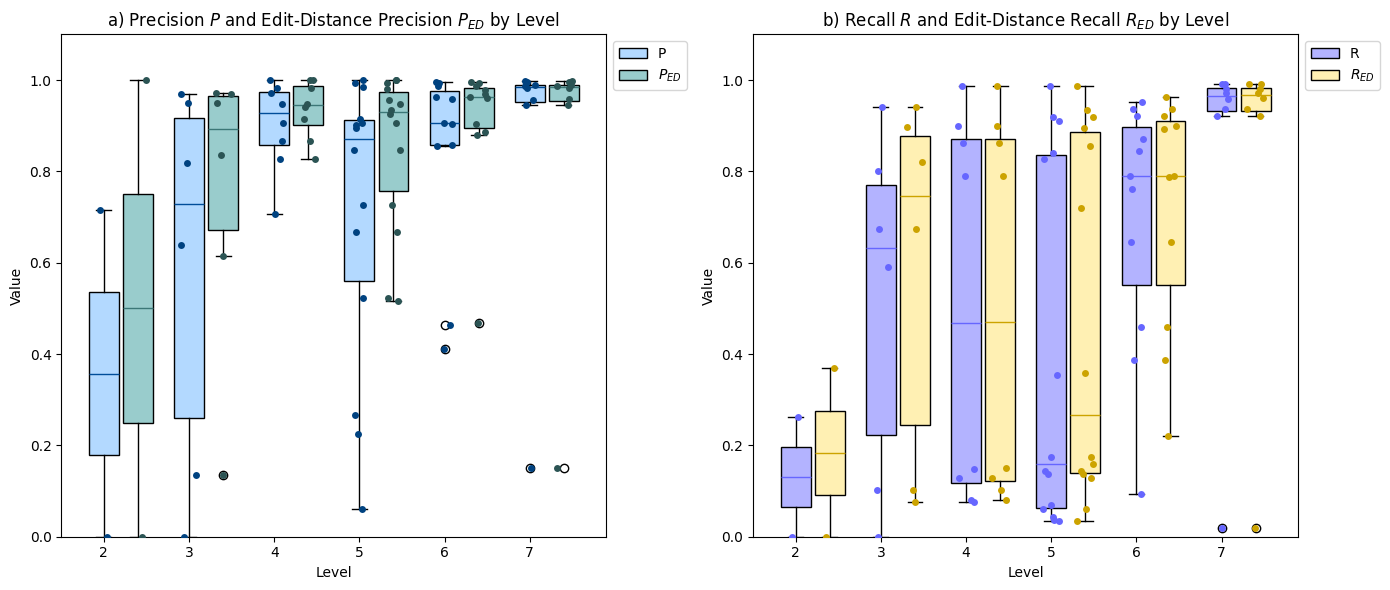

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Assuming precision and recall related data are defined
# precision_2, precision_3, ..., recall_2, recall_3, ...

# Define precision and tolprecision dictionaries
precision = {
    '2': precision_2,
    '3': precision_3,
    '4': precision_4,
    '5': precision_5,
    '6': precision_6,
    '7': precision_7
}

tolprecision = {
    '2': tolprecision_2,
    '3': tolprecision_3,
    '4': tolprecision_4,
    '5': tolprecision_5,
    '6': tolprecision_6,
    '7': tolprecision_7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': recall_2,
    '3': recall_3,
    '4': recall_4,
    '5': recall_5,
    '6': recall_6,
    '7': recall_7
}

tolrecall = {
    '2': tolrecall_2,
    '3': tolrecall_3,
    '4': tolrecall_4,
    '5': tolrecall_5,
    '6': tolrecall_6,
    '7': tolrecall_7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)

# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) Precision $P$ and Edit-Distance Precision $P_{ED}$ by Level')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='P')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{ED}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) Recall $R$ and Edit-Distance Recall $R_{ED}$ by Level')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='R')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$R_{ED}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./combined_precision_recall_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

### LLM-Refined PageParser final figure

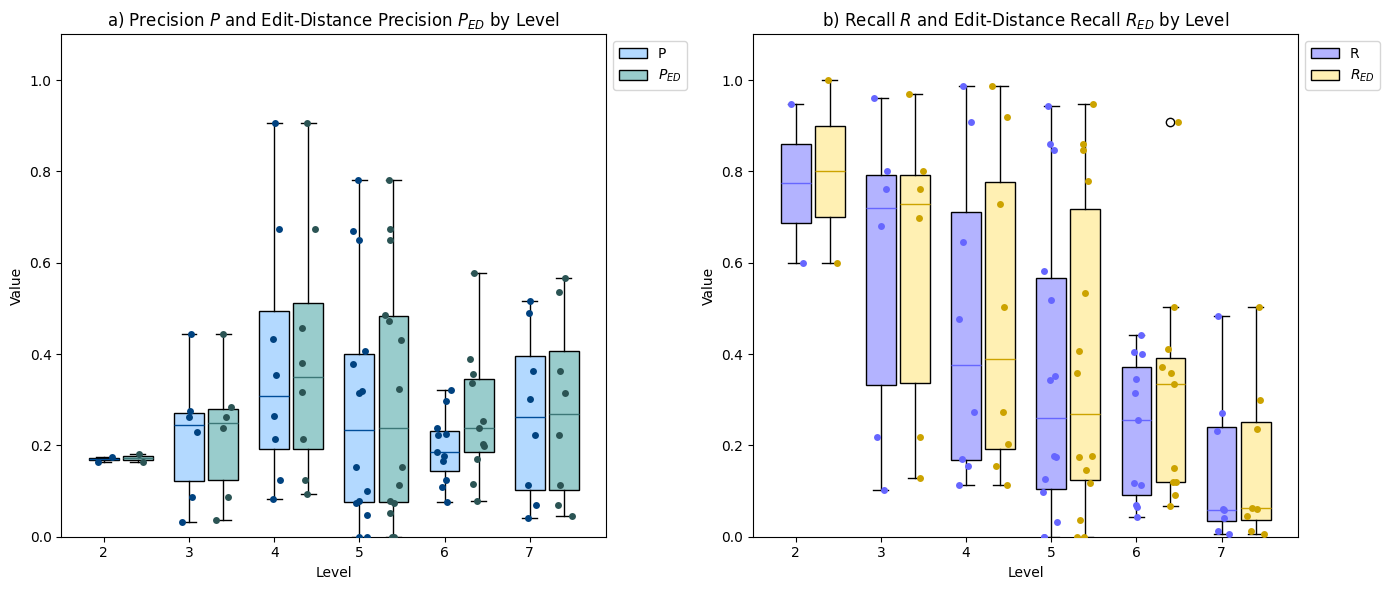

In [16]:
#%pip install matplotlib
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Assuming precision and recall related data are defined
# precision_2, precision_3, ..., recall_2, recall_3, ...

# Define precision and tolprecision dictionaries
precision = {
    '2': llmprecision_2,
    '3': llmprecision_3,
    '4': llmprecision_4,
    '5': llmprecision_5,
    '6': llmprecision_6,
    '7': llmprecision_7
}

tolprecision = {
    '2': llmtolprecision_2,
    '3': llmtolprecision_3,
    '4': llmtolprecision_4,
    '5': llmtolprecision_5,
    '6': llmtolprecision_6,
    '7': llmtolprecision_7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': llmrecall_2,
    '3': llmrecall_3,
    '4': llmrecall_4,
    '5': llmrecall_5,
    '6': llmrecall_6,
    '7': llmrecall_7
}

tolrecall = {
    '2': llmtolrecall_2,
    '3': llmtolrecall_3,
    '4': llmtolrecall_4,
    '5': llmtolrecall_5,
    '6': llmtolrecall_6,
    '7': llmtolrecall_7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)

# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) Precision $P$ and Edit-Distance Precision $P_{ED}$ by Level')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='P')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{ED}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) Recall $R$ and Edit-Distance Recall $R_{ED}$ by Level')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='R')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$R_{ED}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./llm_combined_precision_recall_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

## PDFStructure final figure

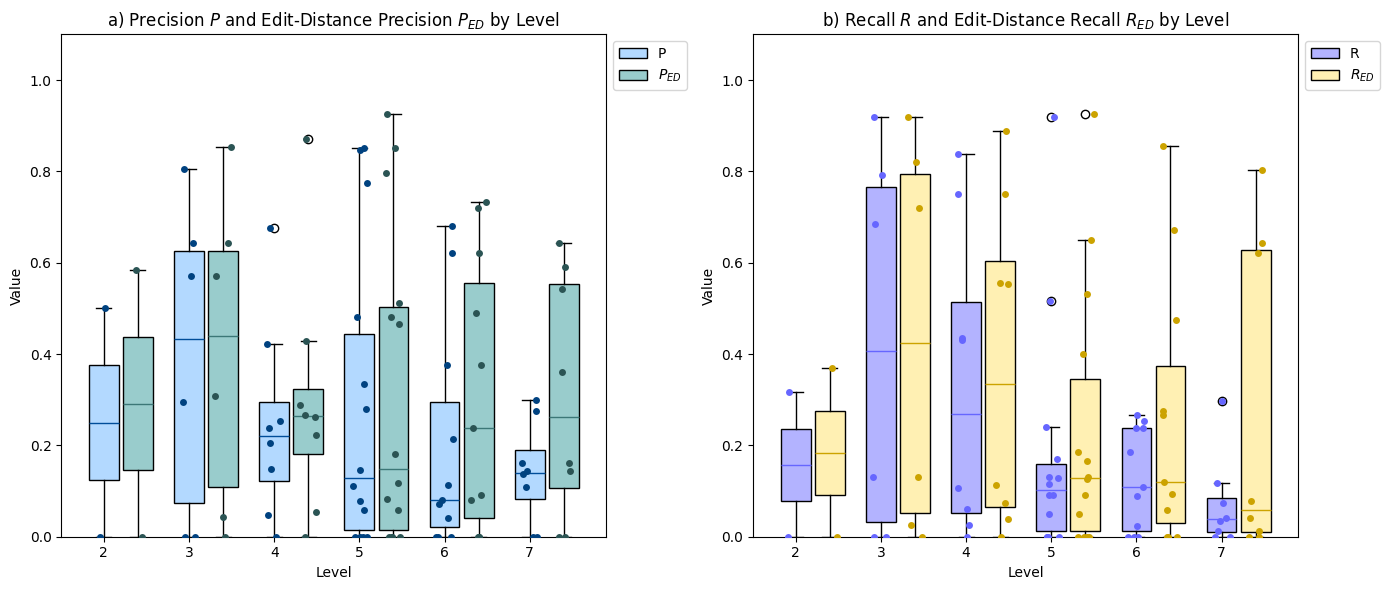

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Assuming precision and recall related data are defined
# precision_2, precision_3, ..., recall_2, recall_3, ...

# Define precision and tolprecision dictionaries
precision = {
    '2': pdsprecision_2,
    '3': pdsprecision_3,
    '4': pdsprecision_4,
    '5': pdsprecision_5,
    '6': pdsprecision_6,
    '7': pdsprecision_7
}

tolprecision = {
    '2': pdstolprecision_2,
    '3': pdstolprecision_3,
    '4': pdstolprecision_4,
    '5': pdstolprecision_5,
    '6': pdstolprecision_6,
    '7': pdstolprecision_7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': pdsrecall_2,
    '3': pdsrecall_3,
    '4': pdsrecall_4,
    '5': pdsrecall_5,
    '6': pdsrecall_6,
    '7': pdsrecall_7
}

tolrecall = {
    '2': pdstolrecall_2,
    '3': pdstolrecall_3,
    '4': pdstolrecall_4,
    '5': pdstolrecall_5,
    '6': pdstolrecall_6,
    '7': pdstolrecall_7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)

# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) Precision $P$ and Edit-Distance Precision $P_{ED}$ by Level')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='P')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{ED}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) Recall $R$ and Edit-Distance Recall $R_{ED}$ by Level')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='R')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$R_{ED}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./combined_precision_recall_results_pds.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Visualize ETD

In [18]:
import csv
dist=None
etd_ps={}
etd_ps_by_level=defaultdict(list)
etd_2_ps=[]
etd_3_ps=[]
etd_4_ps=[]
etd_5_ps=[]
etd_6_ps=[]
etd_7_ps=[]
# you need to generate this file first by running the script evaluate_hierarchies
with open("evaluation_hierarchy_pdfstructure.csv", "r", encoding="utf-8-sig") as file:
    reader = csv.reader(file)
    headers = next(reader)[1:]
    for row in reader:
        etd_ps[row[0]]=row[1]
        etd_ps_by_level[int(row[2])].append((row[0], float(row[1])))
        if int(row[2])==2:
            etd_2_ps.append(float(row[1]))
        if int(row[2])==3:
            etd_3_ps.append(float(row[1]))
        if int(row[2])==4:
            etd_4_ps.append(float(row[1]))
        if int(row[2])==5:
            etd_5_ps.append(float(row[1]))
        if int(row[2])==6:
            etd_6_ps.append(float(row[1]))
        if int(row[2])==7:
            etd_7_ps.append(float(row[1]))

In [19]:
#%pip install openpyxl
import pandas as pd
df=pd.read_excel(open('./data/outline_prefixes.xlsx', 'rb'))
pub_df=df.drop(columns=["Publisher","Number","Alphabet","Roman", "Spelled Out", "Level Indication", "Section Sign", "No Prefix", "Level"])
pub_df['File'] = pub_df['File'].apply(lambda x: str(x)[:-4].lower())
pub_df["File"].unique()

array(['6-traditional-medicines-law-and-the-dis-ordering-of-temporalities',
       'a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu',
       'a-kind-of-mending-restorative-justice-in-the-pacific-islands',
       'access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace',
       'access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati',
       'access-to-knowledge-in-the-age-of-intellectual-property',
       'accountability-and-the-law-rights-authority-and-transparency-of-public-power',
       'administrative-decision-making-in-australian-migration-l',
       'advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide',
       'aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes',
       'agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements',
       'al-haq-a-global-history-of-the-first-palestinian-human-rights-o

In [20]:
# Mapping of files to publishers
file_to_publisher = dict(zip(pub_df['File'], pub_df['Publisher Group']))


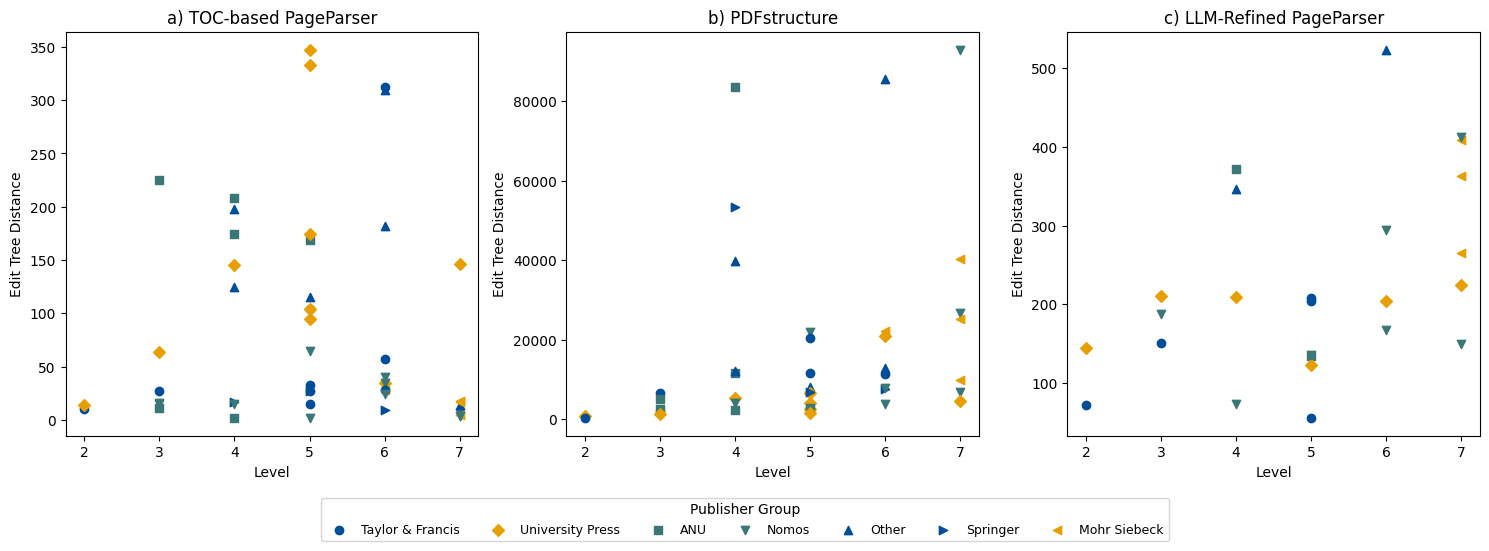

In [23]:
import matplotlib.pyplot as plt
# Define markers and colors for each publisher group
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
colors = ['#004d99', '#3c7777', '#e79f00']  # Define unique colors for each publisher group
# Convert publishers to a list
publishers = list(pub_df['Publisher Group'].unique())

# Determine the common y-axis limits with a margin
all_values_toc = [value for level_data in etd_by_level.values() for file, value in level_data] 
all_values_ps = [value for level_data in etd_ps_by_level.values() for file, value in level_data]
all_values_llm = [value for level_data in llmetd_by_level.values() for file, value in level_data]

custom_y_min, custom_y_max= min(all_values_toc), max(all_values_toc)
y_margin = (custom_y_max - custom_y_min) * 0.05  # 5% margin
custom_y_min -= y_margin
custom_y_max += y_margin

y_min, y_max = min(all_values_ps), max(all_values_ps)
y_margin = (y_max - y_min) * 0.05  # 5% margin
y_min -= y_margin
y_max += y_margin

llmcustom_y_min, llmcustom_y_max= min(all_values_llm), max(all_values_llm)
y_margin = (llmcustom_y_max - llmcustom_y_min) * 0.05  # 5% margin
llmcustom_y_min -= y_margin
llmcustom_y_max += y_margin

# Define figure with 3 side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Reduced width and height

# Plot data for TOC-based PageParser
for level, level_data in etd_by_level.items():
    for file, value in level_data:
        publisher = file_to_publisher[file]
        marker = markers[publishers.index(publisher) % len(markers)]
        color = colors[publishers.index(publisher) % len(colors)]
        ax1.scatter(int(level), value, color=color, marker=marker, label=publisher)

ax1.set_title('a) TOC-based PageParser')
ax1.set_xlabel('Level')
ax1.set_ylabel('Edit Tree Distance')
ax1.set_ylim(custom_y_min, custom_y_max)

# Plot data for PDFstructure
for level, level_data in etd_ps_by_level.items():
    for file, value in level_data:
        publisher = file_to_publisher[file]
        marker = markers[publishers.index(publisher) % len(markers)]
        color = colors[publishers.index(publisher) % len(colors)]
        ax2.scatter(int(level), value, color=color, marker=marker, label=publisher)

ax2.set_title('b) PDFstructure')
ax2.set_xlabel('Level')
ax2.set_ylabel('Edit Tree Distance')
ax2.set_ylim(y_min, y_max)

# Plot data for LLM-Refined PageParser
for level, level_data in llmetd_by_level.items():  # Assuming new dataset
    for file, value in level_data:
        publisher = file_to_publisher[file]
        marker = markers[publishers.index(publisher) % len(markers)]
        color = colors[publishers.index(publisher) % len(colors)]
        ax3.scatter(int(level), value, color=color, marker=marker, label=publisher)

ax3.set_title('c) LLM-Refined PageParser')
ax3.set_xlabel('Level')
ax3.set_ylabel('Edit Tree Distance')
ax3.set_ylim(llmcustom_y_min, llmcustom_y_max)

# Create a single legend for all plots
handles, labels = ax1.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Adjust legend position to reduce empty space
fig.legend(unique_handles, unique_labels, title='Publisher Group', loc='center', bbox_to_anchor=(0.5, -0.05), ncol=7, fontsize=9)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])  # Allow full width usage
plt.savefig("./etd_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

